In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

# Problema 1. Exentricidades

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M=E−e sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad $(e=\sqrt{1−b/a})$ (con $a>b$ los semiejes). Los astrónomos definen las "anomalías" como posiciones angulares: la anomalía media M es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M=\frac{2π}{T}(t−t0)$$

donde $T$ es el periodo orbital y $t0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de
$$f(E)=E−esin(E)−M$$
para $E∈[0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante
$$E−esin(E)−M(t)=0$$
con un paso de $Δt=T/100$. $ti=t0+(i)∗Δt$, comenzando en $E(t0)=0$

El valor de E es: 0.2612311061456491


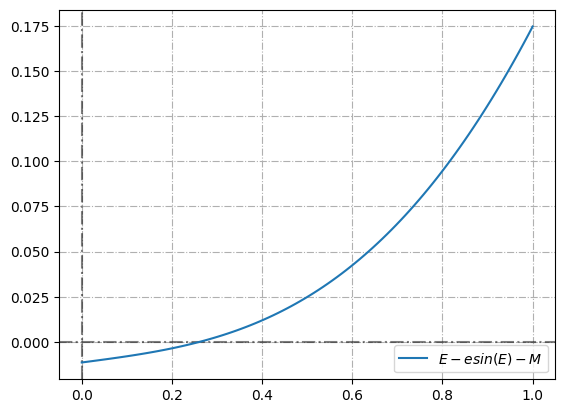

In [2]:
#Encontrar E
e = 0.9672671
T = 75.96000
t0 = 1986.1113
t = 1986.2493 #1 de abrir de 1986 en años decimales, 1 de abril de 1986 = 1986 años con 91 dias

M = lambda t: (2*np.pi / T)*(t - t0)

f = lambda E: E - e*np.sin(E) - M(t)

E = np.linspace(0, 1, 100)
fE = f(E)

Ehalley = newton(f, 0.2, x1= 0.3)

print(f'El valor de E es: {Ehalley}')

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(E, fE, label= '$E - esin(E) - M$')

plt.grid(linestyle= '-.')
plt.legend()



La raiz usando el metodo de la secante fue: 1986.2493
Con el metodo de newton: 1986.2493


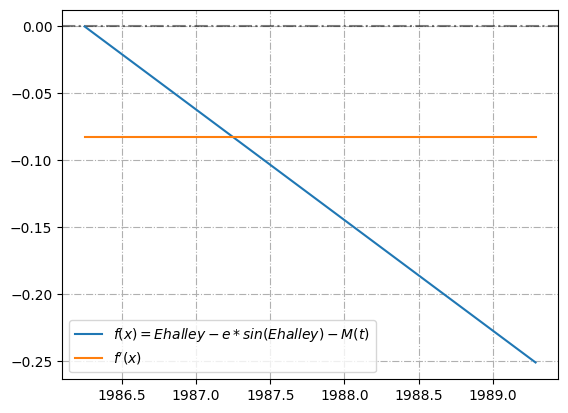

In [3]:
Et = lambda t: Ehalley - e*np.sin(Ehalley) - M(t)
dE = lambda t: -(2*np.pi)/T + (t-t) #Resta para que al momento de hacer la imagen me de una lista de constantes y no una sola constante
deltaT = T/100

raizSec = newton(Et, 1987, x1 =1986.1113 )
raizNew = newton(Et, 1987, fprime= dE)
print(f'La raiz usando el metodo de la secante fue: {raizSec}\nCon el metodo de newton: {raizNew}')

t = np.arange(raizNew, 1990, deltaT)
Et = Et(t)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(t, Et, label= '$f(x) = Ehalley - e*sin(Ehalley) - M(t)$')
plt.plot(t, dE(t), label= "$f'(x)$")

plt.grid(linestyle= '-.')
plt.legend()

# Problema 2. Campo medio

En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$m(T)=tanh(\frac{m(T)}{T})$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente

Para $T=0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

* Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.

In [4]:
def punto_Fijo(g, x0, tol= 1e-8, max_it= 1000):

    for i in range(max_it):

        x1 = g(x0)
        if abs(x1 - x0) < tol:
            return x1
        
        x0 = x1
    
    raise RuntimeError('Maximo de iteraciones alcanzado')

#### a)

$$m(T) = x, x = tanh(\frac{x}{T})$$
$$x - tanh(\frac{x}{T}) = 0$$
$$f(x) = x - tanh(\frac{x}{T}) = 0$$
$$f'(x) = 1 - sech^2(\frac{x}{T})\frac{1}{T} = 0 => f'(x) = 1 - \frac{1}{cosh^2(\frac{x}{T})}\frac{1}{T}$$



Las raices encontradas con el metodo de Newton-Raphson son: (-0.9575, 0.0, 0.9575)
Con el metodo de la secante: (-0.9575, 0.0, 0.9575)
La raiz 0 es inestable fisicamente

Las raices encontradas con el metodo de Npunto fijo son: (-0.9575, 0.9575)


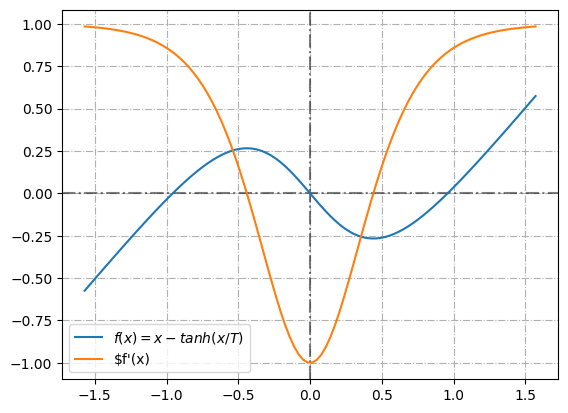

In [5]:
T = 0.5
f = lambda x: x - np.tanh(x/T)
df = lambda x: 1 - 1/(np.cosh(x/T)**2) * 1/T

fpfijo = lambda x: np.tanh(x/T)
x0 = lambda x: x

raicesNewton = round(newton(f, -0.5, fprime= df), 4), round(newton(f, 0.1, fprime= df), 4), round(newton(f, 0.5, fprime= df), 4)
raicesSecante = round(newton(f, -1, x1= -0.5), 4), round(newton(f, -0.1, x1= 0.1), 4), round(newton(f, 0.5, x1= 1), 4)

print(f'Las raices encontradas con el metodo de Newton-Raphson son: {raicesNewton}\nCon el metodo de la secante: {raicesSecante}\nLa raiz 0 es inestable fisicamente\n')

raicesPuntoFijo = round(punto_Fijo(fpfijo, -0.5), 4), round(punto_Fijo(fpfijo, 0.5), 4)

print(f'Las raices encontradas con el metodo de Npunto fijo son: {raicesPuntoFijo}')

x = np.linspace(-np.pi/2, np.pi/2, 100)
y = f(x)
dy = df(x)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(x, y, label= '$f(x) = x - tanh(x/T)$')
plt.plot(x, dy, label= "$f'(x)")

plt.grid(linestyle= '-.')
plt.legend()

#### b)

Debido a que para $0<T<1$ tiene 2 soluciones iguales de signo opuesto, se graficara su valor absoluto, o $±raiz$

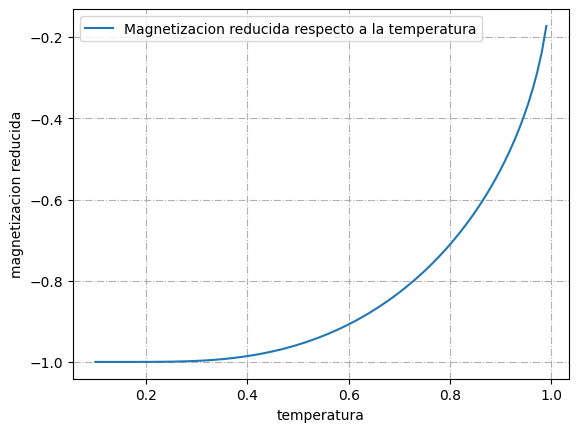

In [6]:
t = np.linspace(0.1, 0.99, 100)
raices = []

for T in t:
    raices.append(round(newton(f, -1, x1= -0.5), 4))

plt.plot(t, raices, label='Magnetizacion reducida respecto a la temperatura')

plt.xlabel('temperatura')
plt.ylabel('magnetizacion reducida')

plt.grid(linestyle= '-.')

plt.legend()

# Problema 3. Energia de Gibbs

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G=−RTln[(\frac{T}{T_0})^{5/2}]$$

donde:

* $R=8.314J/K$ es la constante de los gases.

* $T_0=4.444J/K$ es una constante de referencia.

Determinar la temperatura $T$ a la cual $G=−10^5J$.

Para $G = -10^5J$ tenemos:

$$-10^5J = −RTln[(\frac{T}{T_0})^{5/2}]$$
$$-10^5 + RTln[(\frac{T}{T_0})^{5/2}] = 0$$ 

In [7]:
R = 8.314
T0 = 4.444

f = lambda t: -1e5 + R*t*np.log((t/T0)**(5/2))
TG = newton(f, 800, x1=1000)

print(f'El valor de t para el cual G es -10^5 es: {TG}')

El valor de t para el cual G es -10^5 es: 904.9743413388665


# Problema 4. Difracción de Fraunhofe

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $λ$, está dada por:

$$I(θ)=I_0[\frac{sin(πWsinθ/λ)}{πWsinθ/λ}]^2$$

donde $θ$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x=πWsinθ/λ$$

la intensidad y su derivada se expresan como:

$$I(x)=I_0(\frac{sinx}{x})2,\quad I(0)=I_0$$
$$I'(x)=\frac{2I_0}{x}(cosx−\frac{sinx}{x})\frac{sinx}{x},\quad I'(0)=0$$

* Graficar $I(x)$ y $I'(x)$ en el intervalo $x∈[−10,10]$.

* Calcular el valor $x_{1/2}$ (positivo) donde $I(x)=I_0/2$, resolviendo la ecuación $I(x)−I_0/2=0$ con el método de la secante y aproximación inicial $x_0=π$.

* Encontrar los máximos locales $x_i∈[−10,10]$ resolviendo $I'(x)=0$.

* Usar un paso $h=0.5$ para separar raíces y aplicar el método de la regula falsi (falsa posición) para mantenerlas acotadas.

Nota:
Puede tomar $I0=1$.

#### a)

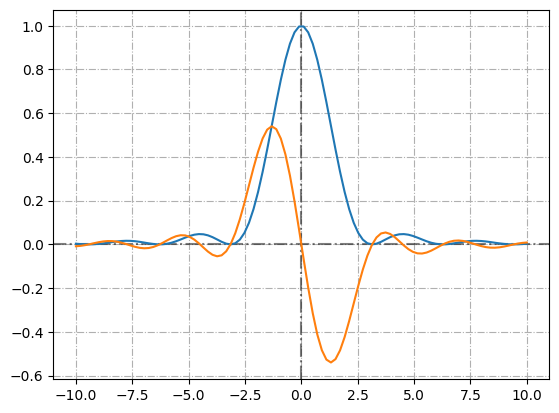

In [8]:
I0 = 1

I = lambda x: np.where(x == 0, 1, (np.sin(x)/x)**2)
dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)

x = np.linspace(-10, 10, 100)

y = I(x)
dy = dI(x)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(x, y)
plt.plot(x, dy)

plt.grid(linestyle= '-.')

#### b)

In [9]:
f = lambda x: I(x) - I0/2

raiz = newton(f, np.pi, x1= 0)

print(f'El valor de x donde I(x) es {I0}/2 es: {raiz}')

El valor de x donde I(x) es 1/2 es: 1.3915573782515098


C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\2415599388.py:3: RuntimeWarning: invalid value encountered in scalar divide
  I = lambda x: np.where(x == 0, 1, (np.sin(x)/x)**2)


#### c)

In [10]:
maximos = newton(dI, -7.6, x1=-7.4), newton(dI, -5, x1= -4.5), newton(dI, -1, x1= 1), newton(dI, 4.5, x1= -5), newton(dI, 7.4, x1= -7.4)

print(f'Los maximos locales en el intervalo [-10, 10] son: \n{maximos}\n')

Los maximos locales en el intervalo [-10, 10] son: 
(-7.725251836937708, -4.493409457909064, 0.0, -20.37130295928756, 0.0)



C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\2415599388.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)
C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\2415599388.py:4: RuntimeWarning: invalid value encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)


#### d)

In [11]:
def regulaFalsi(f, a, b, tol= 1e-7, maxIter= 1000):
    '''
    Calcula la raiz de f, partiendo de a y b tq f(a) y f(b) tengan signos distintos

    Entradas:
    
    f: Funcion para encontrar las raices
    a: coordenada en x de f(a)
    b: coordenada en x de f(b)
    tol: tolerancia
    maxIter: maximo de iteraciones

    Salidas:

    c: raiz
    '''

    if f(a)*f(b) > 0:
        raise RuntimeError('f(a) y f(b) deben ser de signos distintos')

    for n in range(maxIter+1):

        c = (a*f(b) - b*f(a))/(f(b) - f(a))

        if abs(f(c)) < tol:
            return c
        elif f(c)*f(a) < 0:
            b = c
        else:
            a = c
    
    raise RuntimeError('Maximo de iteraciones alcanzado')

In [12]:
#calcular en los intervalos
h = 0.5

intervalos = np.arange(-10, 10.5, h)

print(f'Las raices de dI son:\n')

for i in intervalos:
    dIi = dI(i)
    dIi1 = dI(i+h)

    if dIi*dIi1 < 0:
        print(f'x = {regulaFalsi(dI, i, i+h)}')
        

Las raices de dI son:

x = -9.424778908059865
x = -7.725251879794755
x = -6.283186576357559
x = -4.4934100239108865
x = -3.1415928257927983
x = 3.1415928257927983
x = 4.4934100239108865
x = 6.283186576357559
x = 7.725251879794755
x = 9.424778908059865


C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\2415599388.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)
C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\2415599388.py:4: RuntimeWarning: invalid value encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)


# Problema 5. Ley de plank

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(λ,T)=\frac{8πhc}{λ^5}\frac{1}{exp(hc/(λkBT))−1},$$

donde:

* $T$ = temperatura de equilibrio (K)
* $λ$ = longitud de onda (m)
* $h=6.626×10^{−34}J ⋅ s$ (constante de Planck)
* $k_B=1.381×10^{−23} J⋅K^{−1}$ (constante de Boltzmann)
* $c=2.998×10^{8}m⋅s^{−1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:

$$x=\frac{λ}{λ_0},\quad λ_{0}=\frac{hc}{k_BT},\quad K=\frac{8πk_BT}{λ^{4}_{0}},$$

la ley se simplifica a:

$$u(λ,T)=K\frac{1}{x^5(e^{1/x}−1)^2}$$
 
La derivada (para encontrar máximos):

$$\frac{∂u}{∂λ}=Kλ_0\frac{5x+(1−5x)e^{1/x}}{x^7(e^{1/x}−1)^2}.$$

* Graficar $u(λ,T)$ y $∂u/∂λ$ para $T=4000,5000,6000$ K.

* Resolver $∂u/∂λ=0$ para $T=5778$ K con el método de Bisección y de Newton.

* Validar la ley de desplazamiento de Wien: $λ_{max}T≈2.898×10^{−3} m ⋅ K$

C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\548070564.py:9: RuntimeWarning: overflow encountered in square
  u = lambda λ, T: K(T) / (x(λ)**5 * (np.exp(1/x(λ)) - 1)**2)
C:\Users\luisd_lp9nro0\AppData\Local\Temp\ipykernel_15816\548070564.py:10: RuntimeWarning: overflow encountered in square
  dudλ = lambda λ, T: K(T)*λ0(T) * (5*x(λ) + (1 - 5*x(λ))*np.exp(1/x(λ))) / (x(λ)**7 * (np.exp(1/x(λ)) - 1)**2)


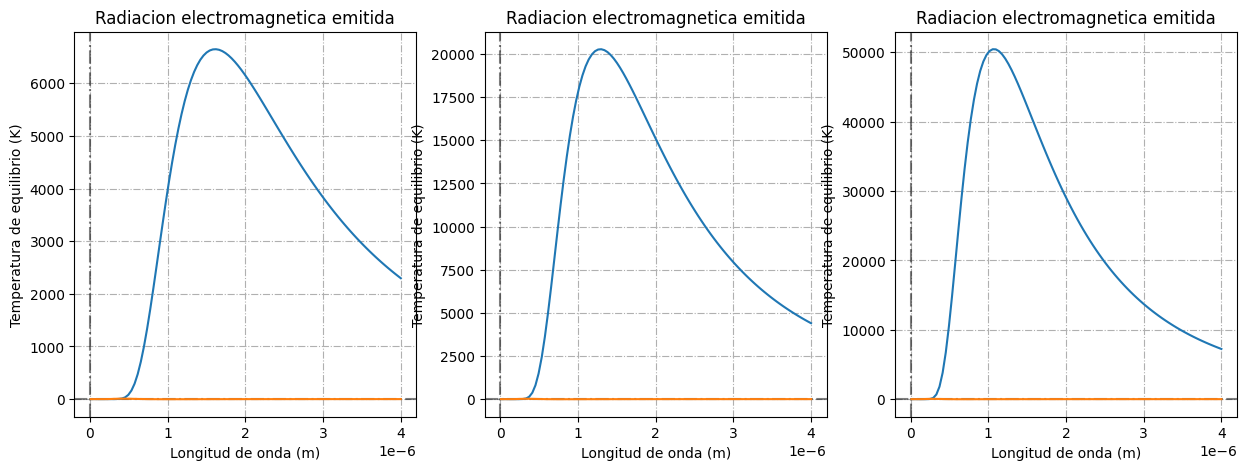

In [13]:
h = 6.626e-34
kB = 1.381e-23
c = 2.998e8
 
λ0 = lambda T: h*c / (kB*T)
x = lambda λ: λ/λ0(T)
K = lambda T: 8*np.pi*kB*T / λ0(T)**4

u = lambda λ, T: K(T) / (x(λ)**5 * (np.exp(1/x(λ)) - 1)**2)
dudλ = lambda λ, T: K(T)*λ0(T) * (5*x(λ) + (1 - 5*x(λ))*np.exp(1/x(λ))) / (x(λ)**7 * (np.exp(1/x(λ)) - 1)**2)

#Grafica
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
axIndex = 0


for T in range(4000, 7000, 1000):
    λ = np.linspace(1e-8, 0.4e-5, 100)
    
    uλ = u(λ, T)
    duλdλ = dudλ(λ, T)

    ax[axIndex].axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
    ax[axIndex].axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

    ax[axIndex].plot(λ, uλ)
    ax[axIndex].plot(λ, duλdλ)

    ax[axIndex].set_xlabel('Longitud de onda (m)')
    ax[axIndex].set_ylabel('Temperatura de equilibrio (K)')

    ax[axIndex].set_title('Radiacion electromagnetica emitida')

    ax[axIndex].grid(linestyle= '-.')

    axIndex += 1

In [14]:
Ti = 5778

du = lambda λ: dudλ(λ, T)

raizBisecRad = bisect(du, 4e-8, 4e-6)
raizNewtonRad = newton(du, 4e-8, x1= 4e-6)

print(f'La raiz usando el metod de la biseccion: {raizBisecRad}\nUsando el metodo de newton: {raizNewtonRad}')


La raiz usando el metod de la biseccion: 4.828477287292479e-07
Usando el metodo de newton: 4.0000000000909595e-08


In [15]:
λmax = raizNewtonRad #el λ donde alcanza la maxima emicion

wienAprox = 2.898e-3

wienTeorico = λmax*T

print(f'{wienTeorico}\n{wienAprox}')

0.00024000000000545758
0.002898


# Problema 6. Posos de potencial

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$tan\sqrt {w^2mE/2ℏ^2} =$$
$$\sqrt {(V-E)/E}\quad para \quad estados \quad pares$$
$$\sqrt {E/(V-E)}\quad para \quad estados \quad impares$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

* Para un electrón (masa $9.11×10^{−31kg}$) en un pozo con $V=20eV$ y $w=1nm$, escriba un programa en Python para graficar las tres cantidades:

$$y_1=tan\sqrt{w^2mE/2ℏ^2},\quad y_2=\sqrt{(V−E)/E},\quad y_3=-\sqrt{E/(V-E)}$$

en el mismo gráfico, como función de $E$ desde $E=0$ hasta $E=20eV$. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

* Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $0.001eV$ usando el método de la bisección.

$$tan(\sqrt {\frac{w^2mE}{2}})\frac{1}{ℏ}$$
$$tan(\sqrt {\frac{mE}{2}}\frac{w}{ℏ})$$
$$tan(\sqrt {2mE}\frac{w}{2ℏ})$$

In [106]:
from scipy.constants import hbar, electron_mass, electron_volt

'''Tras investigaciones se decidio usar las unidades estandar, con energias en jouls y distancias en metros para tener coherencia con la
constante hbar'''

m = electron_mass
V = 20 * electron_volt
w = 1 * 1e-9 #nm en m

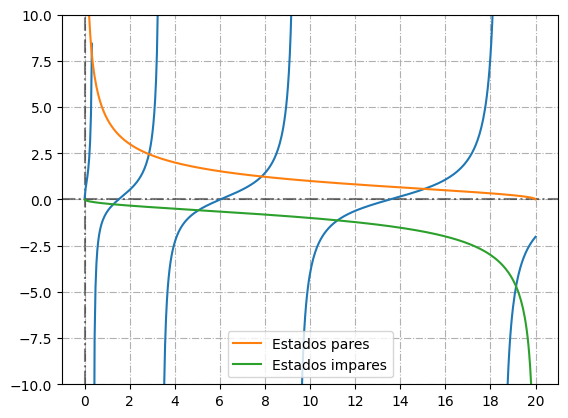

In [172]:
f = lambda E: np.tan( np.sqrt(2*m*E) * w/(2*hbar))
par = lambda E:np.sqrt((V-E)/E)
impar = lambda E:-np.sqrt(E/(V-E))

E = np.linspace(.001, 19.999, 500)
E_eV = E * electron_volt
y1 = f(E_eV)
y2 = par(E_eV)
y3 = impar(E_eV)

mask = np.abs(y1) > 32 #para graficar los saltos en las asintostas
y1 = np.where(mask, np.nan, y1)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(E, y1)
plt.plot(E, y2, label= 'Estados pares')
plt.plot(E, y3, label= 'Estados impares')

plt.ylim(-10, 10)

plt.xticks(np.arange(0,21, 2))
plt.grid(linestyle= '-.')

plt.legend()


En la grafica se puede estimar estimar aproximadamente que los 6 priemros estados de energia estan en:

$$≈ 0.5eV,\quad par$$
$$≈ 1.5eV,\quad impar$$
$$≈ 3eV, \quad par$$
$$≈ 5eV, \quad impar$$
$$≈ 7.9eV, \quad par$$
$$≈ 11.2eV, \quad impar$$

Los estados de energia pares en eV exactos son: (0.31796875, 2.8507812500000003, 7.84921875)
Los estados de energia impares en eV exactos son: (1.26953125, 5.05078125, 11.21484375)


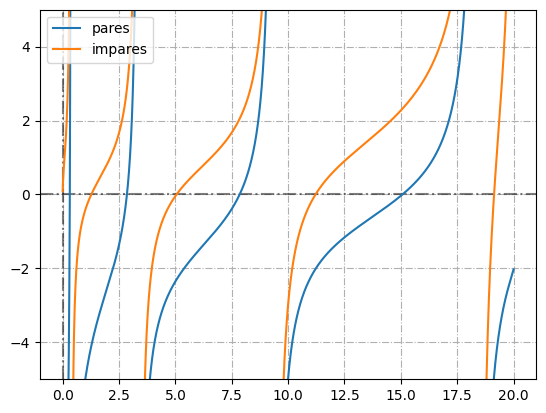

In [285]:
tolerancia = 0.001 * electron_volt #0.001eV en jouls
fPar = lambda E: f(E) - par(E)
fimpar = lambda E: f(E) - impar(E)

tol = 0.001 * electron_volt

estados_pares = (
    bisect(fPar, 0.3*electron_volt,0.325*electron_volt, xtol= tol) / electron_volt,
    bisect(fPar, 2.8*electron_volt,2.9*electron_volt, xtol= tol) / electron_volt,
    bisect(fPar, 7.8*electron_volt,7.9*electron_volt, xtol= tol) / electron_volt
    )

estados_impares = (
    bisect(fimpar, 1.2*electron_volt,1.3*electron_volt, xtol= tol) / electron_volt,
    bisect(fimpar, 5*electron_volt,5.1*electron_volt, xtol= tol) / electron_volt,
    bisect(fimpar, 11.2*electron_volt,11.3*electron_volt, xtol= tol) / electron_volt
    )

print(f'Los estados de energia pares en eV exactos son: {estados_pares}\nLos estados de energia impares en eV exactos son: {estados_impares}')

E = np.linspace(.001, 19.999, 5000)
E_eV = E * electron_volt

pares = fPar(E_eV)
impares = fimpar(E_eV)

mask = np.abs(pares) > 200
pares = np.where(mask, np.nan, pares)
impares = np.where(mask, np.nan, impares)

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)
plt.axvline(color= 'Black', linestyle= '-.', alpha= 0.5)

plt.plot(E, pares, label= 'pares')
plt.plot(E, impares, label= 'impares')

plt.ylim(-5, 5)

plt.grid(linestyle= '-.')
#plt.xticks(np.arange(0,21, 1))
plt.legend()

In [280]:
fimpar(11.3*electron_volt)

0.08099245838644853

# Problema 7. Puntos de Lagrange

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} −\frac{Gm}{(R−r)^2}=ω^2r$$
 
donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ω$ es la velocidad angular tanto de la Luna como del satélite.

* La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G=6.674×10^{−11}m^{3}kg^{−1}s^{−2}$$
$$M=5.974×10^{24}kg$$
$$m=7.348×10^{22}kg$$
$$R=3.844×10^{8}m$$
$$ω=2.662×10^{−6}s^{−1}$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

$$\frac{GM}{ω^2(r^2)} −\frac{Gm}{ω^2(R−r)^2}=r$$
$$frac{GM}{ω^2(r^2)} −\frac{Gm}{ω^2(R−r)^2} - r=0$$

El punto de lagrange L1 se encuentra en r= 326045071.66535544


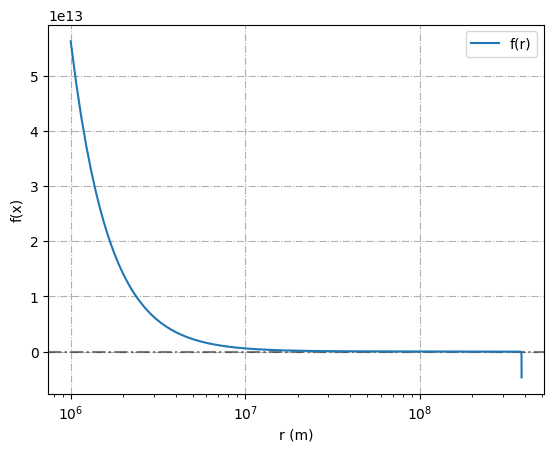

In [18]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

f = lambda r:  G*M / (w**2 *r**2) - G*m/(w**2 * (R - r)**2) - r

plt.axhline(color= 'Black', linestyle= '-.', alpha= 0.5)

x = np.linspace(1e6, R*0.999, 5000)
y = f(x)

plt.semilogx(x, y, label= 'f(r)')

plt.xlabel('r (m)')
plt.ylabel('f(x)')

plt.grid(linestyle= '-.')

plt.legend()

L1 = newton(f, 1e7, x1= R*0.999, tol=1e-15)

print(f'El punto de lagrange L1 se encuentra en r= {L1}')